In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
from phd_plots import *


#Activation functions
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x):
    return np.maximum(0.05*x,x)

def elu(xx, aa):
    return [aa*(np.exp(x)-1) if x < 0 else x for x in xx]



https://github.com/millskyle/phd_thesis/raw/main/methods/figs/example_functions.pdf


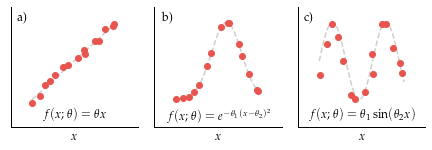

In [2]:
fig, ax = triple_wide(height=2.25)

np.random.seed(0)
N=15

x = np.linspace(0,1,num=N)+(np.random.rand(N)-0.5)*0.1
_x = np.linspace(0,1,N*4)

def ex1(x):
    return x

def ex2(x):
    return np.exp(-16.*(x-0.6)**2)

def ex3(x):
    return 0.5*(np.sin(x*10) + 1)

y1 = ex1(x)+(np.random.rand(N)-0.5)*0.1
y2 = ex2(x)
y3 = ex3(y1)


ax[0].plot(_x, ex1(_x), '--', color=GRAYCOLOR, alpha=0.5 )
ax[1].plot(_x, ex2(_x), '--', color=GRAYCOLOR, alpha=0.5 )
ax[2].plot(_x, ex3(_x), '--', color=GRAYCOLOR, alpha=0.5 )

ax[0].plot(x, y1, 'o')
ax[1].plot(x, y2, 'o')
ax[2].plot(x, y3, 'o')

ax[0].text(0.5,0.1,"$f(x; \\theta)=\\theta x$", va='center',ha='center', transform=ax[0].transAxes)
ax[1].text(0.5,0.1,"$f(x; \\theta)= e^{-\\theta_1(x-\\theta_2)^2}$", va='center',ha='center', transform=ax[1].transAxes)
ax[2].text(0.5,0.1,"$f(x; \\theta)= \\theta_1 \sin(\\theta_2 x) $", va='center',ha='center', transform=ax[2].transAxes)


#ax[0].set_ylabel("$f(x)$")
for a in ax:
    a.set_xlabel("$x$")
    a.set_xticks([])
    a.set_yticks([])
    a.set_xlim([-0.25,1.25])
    a.set_ylim([-0.35,1.2])
    spineless(a)
    
publish_figure("example_functions.pdf")


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/intro_neuralnet.pdf


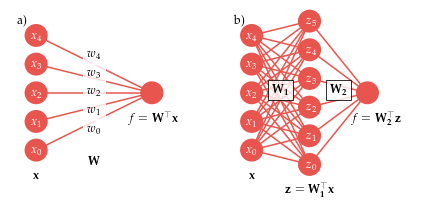

In [4]:
fig, axs = double_wide(labels=["a)","b)"])



#Single-layer model:
ax = axs[0]
p = []

for i in range(5):
    p.append(matplotlib.patches.Circle((0,i), 0.4))
    p.append(matplotlib.lines.Line2D((0,4),(i,2)))
    ax.text(0,i,f"$x_{{{i}}}$",ha='center',va='center',color='white' )
    ax.text(2, 0.75+i*0.65, s=f"$w_{{{i}}}$", ha='center',va='center', bbox=dict(edgecolor='white', facecolor='white', alpha=0.8))
    
p.append(matplotlib.patches.Circle((4,2), 0.4))

for a in p:
    ax.add_artist(a)

ax.text(0, -1, s="$\mathbf{x}$", ha='center')
ax.text(2, -0.5, s="$\mathbf{W}$", ha='center')

ax.text(4, 1, s="$f = \mathbf{W^\\top x}$", ha='center')

ax.set_axis_off()
    
ax.set_ylim([-1,5])
ax.set_xlim([-1,6])


#Two-layer model:
ax = axs[1]
p = []


#First layer of nodes, and cnxs to second layer
for i in range(5):
    p.append(matplotlib.patches.Circle((0,i), 0.4))
    
    for j in range(6):
        p.append(matplotlib.lines.Line2D((0,2),(i,j-0.5)))
    ax.text(0,i,f"$x_{{{i}}}$",ha='center',va='center',color='white' )

#second layer of nodes:
for j in range(6):
    p.append(matplotlib.patches.Circle((2,j-0.5), 0.4))
    p.append(matplotlib.lines.Line2D((2,4),(j-0.5,2)))
    ax.text(2,j-0.5,f"$z_{{{j}}}$",ha='center',va='center',color='white' )        
    
p.append(matplotlib.patches.Circle((4,2), 0.4))

for a in p:
    ax.add_artist(a)

ax.text(0, -1, s="$\mathbf{x}$", ha='center', )
ax.text(1, 2, s="$\mathbf{W_1}$", ha='center', bbox=dict(facecolor='white', alpha=0.8))
#ax.text(2, 5, s="$\mathbf{z}$", ha='center')
ax.text(3, 2, s="$\mathbf{W_2}$", ha='center', bbox=dict(facecolor='white', alpha=0.8))
#ax.text(4, 5, s="$f$", ha='center')


ax.text(2, -1.5, s="$\mathbf{z} = \mathbf{W_1^\\top x}$", ha='center')
ax.text(4+0.25, 1, s="$f = \mathbf{W_2^\\top z}$", ha='center')

ax.set_axis_off()
    
ax.set_ylim([-1,5])
ax.set_xlim([-1,6])


publish_figure("intro_neuralnet.pdf")
         
        


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/sigmoid.pdf


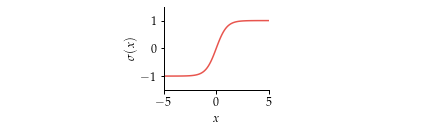

In [3]:


x = np.linspace(-5,5,100)

fig, axs = triple_wide(height=2, labels=['','',''])

axs[0].set_axis_off()
axs[2].set_axis_off()

axs[1].plot(x, np.tanh(x))


axs[1].set_ylim([-1.5,1.5])
axs[1].set_xlim([-5,5])
axs[1].set_yticks([-1,0,1])
axs[1].set_xticks([-5,0,5])
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$\sigma(x)$")
spineless(axs[1])
    
publish_figure("sigmoid.pdf")

https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_one.pdf


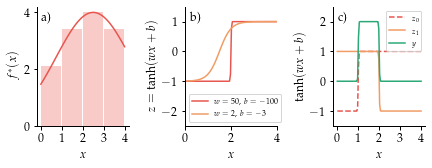

In [4]:
fig, ax = triple_wide()


def f(x):
    return 4*np.exp(-(0.4*x-1)**2)
    
x = np.linspace(0, 4, num=100)
y = f(x)
ax[0].plot(x,y)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].bar(np.arange(4)+0.5, f(np.arange(4)+0.5), width=0.95, alpha=0.3)
ax[0].set_ylabel("$f^{*}(x)$")

ax[1].plot(x, np.tanh(50*x-100), label="$w=50,\ b=-100$")
ax[1].plot(x, np.tanh(2*x-3), label="$w=2,\ b=-3$")
ax[1].set_xlim([0,4])
ax[1].set_ylim([-2.5,1.5])
ax[1].legend(fontsize=8)
ax[1].set_ylabel("$z=\\tanh(wx+b)$")


ax[2].plot(x, np.tanh(50*x-50), '--', label='$z_0$')
ax[2].plot(x, np.tanh(-50*x+100), '-', label='$z_1$')
ax[2].plot(x, np.tanh(50*x-50) + np.tanh(-50*x+100), alpha=1.0, label='$y$')
ax[2].legend(fontsize=8)
ax[2].set_ylim([-1.5,2.5])
ax[2].set_xticks([0,1,2,3,4])
ax[2].set_ylabel("$\\tanh(wx+b)$")


for a in ax:
    a.set_xlabel("$x$")
    spineless(a)

publish_figure("universal_one.pdf")


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_two.pdf


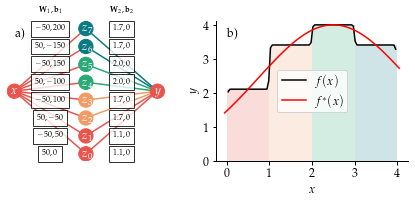

In [5]:

    

    
## EXAMPLE: 
#fig, ax = plt.subplots(1,1)
#bounds = draw_ann(ax, xy=(1,1), layers=[2,3,4,5,6,1])
#bounds = draw_ann(ax, xy=(1,5), layers=[2,1], bounds=bounds)
#draw_ann(ax, xy=(1,-3), layers=[2,1], bounds=bounds)
#fig.show()

fig, ax = double_wide()

x = np.linspace(-0.05, 4.05, num=100)

mag_W=50
W1 = [mag_W, -mag_W]*4
b1 = [mag_W*0, mag_W] + [-mag_W, mag_W*2] + [-mag_W*2, mag_W*3] + [-mag_W*3, mag_W*4]
y = 0


W2 = [1,1,1,1,1,1,1,1]
W2 = [f(i+0.5)/2. for i in [0,0,1,1,2,2,3,3]]
b2 = [0,0,0,0,0,0,0,0]

for l in range(len(W1)):
    y+=W2[l]*np.tanh(W1[l]*x + b1[l]) + b2[l]


ax[1].plot(x[2:-2], y[2:-2], color='black', label="$f(x)$")
ax[1].plot(x, f(x), color='red', label="$f^{*}(x)$")
ax[1].legend(loc='center')


c = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [c[0],c[0],c[1],c[1],c[2],c[2],c[3],c[3]]
for i in range(4):
    ax[1].bar(i+0.5,f(i+0.5),width=1.0, alpha=0.2, color=colors[2*i])


bounds = draw_ann(ax[0], xy=(0,0), spacing=[4,4],
                  layers=[1,8,1], colors=[None,colors,None],
                  text=[["$x$"], [f"$z_{{{i}}}$" for i in range(8)], ["$y$"]])

for i in range(8):
    ax[0].text(4-2,-4+i,f"${{{W1[i]}}},{{{b1[i]}}}$", va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

for i in range(8):
    ax[0].text(4+2,-4+i,f"${{{W2[i]:.1f}}},{{{b2[i]}}}$", va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
    
ax[0].text(4-2,-4+8,"$\mathbf{W}_1, \mathbf{b}_1$", va='center',size=8, ha='center', zorder=101) 
ax[0].text(4+2,-4+8,"$\mathbf{W}_2, \mathbf{b}_2$", va='center',size=8, ha='center', zorder=101) 
    
#for i in range(8):
#    ax[0].text(3-1.5,-4+i,ts[i], va='center',size=8, ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

    
ax[0].set_axis_off()
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[1].set_ylim([0,4.1])

spineless(ax[1])

publish_figure("universal_two.pdf")







/home/kmills/git/phd_thesis/methods/phd_plots.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(fname)


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/universal_deep.pdf


/home/kmills/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


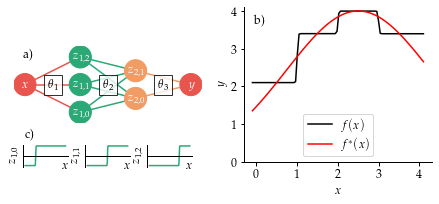

In [6]:
fig, ax = double_wide()

x = np.linspace(-0.1, 4.1, num=100).reshape((-1,1))
y = np.zeros_like(x)

mag_W=50
W1 = np.array([mag_W,mag_W,mag_W]).reshape((1,3))
b1 = np.array([-1*mag_W,-2*mag_W,-3*mag_W]).reshape((3,1))

W2 = np.array([[.34/2-.21/2,0],
               [.4/2-.34/2,0],
               [0.0,.4/2-.34/2]]).reshape((3,2))
b2 = np.array([0,0]).reshape((2,1))


W3 = 2.5*np.array([4.0,-4.0]).reshape((2,1))
b3 = np.array([2.75]).reshape((1,1))



l1_out = np.array([np.tanh( W1.T@x[i].reshape((1,1)) + b1) for i in range(len(x))])


for i in range(len(x)):
    y_ = np.tanh( W1.T@x[i].reshape((1,1)) + b1)
    y_ = np.tanh(W2.T@y_ + b2)
    y_ = W3.T @ y_
    y[i] = y_ + b3
        
ax[1].plot(x, y, color='black', label="$f(x)$")
ax[1].plot(x, f(x), color='red', label="$f^{*}(x)$")
ax[1].legend(loc='lower center')


#for i in range(4):
#    ax[1].bar(i+0.5,f(i+0.5),width=1.0, alpha=0.2, color=colors[2*i])


c = plt.rcParams['axes.prop_cycle'].by_key()['color']

bounds = draw_ann(ax[0], xy=(0,0), spacing=[2,2,2],
                  layers=[1,3,2,1],
                  colors=[None, [c[2]]*3, [c[1],c[1]], None],
                  text=[["$x$"], [f"$z_{{1,{{{i}}}}}$" for i in range(3)], [f"$z_{{2,{{{i}}}}}$" for i in range(2)], ["$y$"]])

ax[0].set_axis_off()
ax[1].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[1].set_ylim([0,4.1])

W1 = W1.flatten()
b1 = b1.flatten()

ax[0].text(1, -0.5, "$\\theta_1$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(3, -0.5, "$\\theta_2$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(5, -0.5, "$\\theta_3$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

spineless(ax[1])    



subaxs = [fig.add_axes([0.05+i*0.14,0.2,.1,.1]) for i in range(3)]
for i in range(3):
    subaxs[i].plot(x, l1_out[:,i,0], color=c[2])
    subaxs[i].spines['right'].set_visible(False)
    subaxs[i].spines['top'].set_visible(False)
    subaxs[i].spines['bottom'].set_position('center')
    subaxs[i].set_xticks([])
    subaxs[i].set_xlabel('$x$', loc='right')
    subaxs[i].set_ylabel(f"$z_{{1,{{{i}}}}}$")
    subaxs[i].set_yticks([])
    
    
    
    subaxs[i].set_yticks([])
    
subaxs[0].text(-0.1,1.8,"c)")


    
publish_figure("universal_deep.pdf")    


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/backprop_neuralnet.pdf


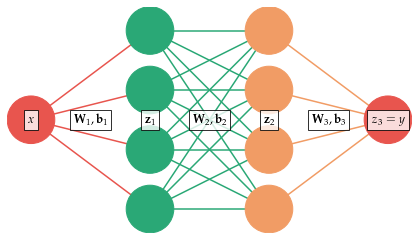

In [25]:
fig, ax = single_wide()

c = plt.rcParams['axes.prop_cycle'].by_key()['color']
width=4
bounds = draw_ann(ax[0], xy=(0,0), spacing=[2,2,2],
                  layers=[1,width,width,1],
                  colors=[None, [c[2]]*width, [c[1]]*width, None],
                )

ax[0].set_axis_off()


ax[0].text(0, -0.5, "$x$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

ax[0].text(1, -0.5, "$\\textbf{W}_1, \\textbf{b}_1$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(3, -0.5, "$\\textbf{W}_2, \\textbf{b}_2$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(5, -0.5, "$\\textbf{W}_3, \\textbf{b}_3$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

ax[0].text(2, -0.5, "$\\textbf{z}_1$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(4, -0.5, "$\\textbf{z}_2$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))
ax[0].text(6, -0.5, "$z_3=y$", va='center',ha='center', zorder=101, bbox=dict(facecolor='white', alpha=0.8))

publish_figure("backprop_neuralnet.pdf")

In [402]:
x = np.linspace(-5,5,100)
dx = x[1]-x[0]


activations = {
    "Linear": lambda x: x,
    "Sigmoid": lambda x: 1/(1+np.exp(-(x))),
    "Tanh":np.tanh,
    "ReLU": lambda x: np.maximum(0,x),
    "Leaky ReLU": lambda x: np.maximum(0.1*x,x),
    "ELU": lambda x: np.piecewise(x, [x<0, x>=0], [lambda x: np.exp(x)-1, lambda x: x])
}

activation_derivatives = {
    "Linear": lambda x: np.ones_like(x),
    "Sigmoid": lambda x: np.exp(-x)/np.power(1+np.exp(-x), 2),
    "Tanh":lambda x: np.power(1./(0.5 * (np.exp(x) + np.exp(-x))),2),
    "ReLU": lambda x: np.piecewise(x, [x<0, x>=0], [0, 1]) ,
    "Leaky ReLU": lambda x: np.piecewise(x, [x<0, x>=0], [0.1, 1]),
    "ELU": lambda x: np.piecewise(x, [x<0, x>=0], [lambda x: np.exp(x), 1])
}


import time
N = 10000000
nums = np.random.rand(N)

timings = {}
dtimings = {}

for fn in activations:
    tick = time.time()
    activations[fn](nums)
    tock = time.time()
    timings[fn] = (tock-tick)/N
    tick = time.time()
    activation_derivatives[fn](nums)
    tock = time.time()
    dtimings[fn] = (tock-tick)/N

https://github.com/millskyle/phd_thesis/raw/main/methods/figs/activationfunctions.pdf


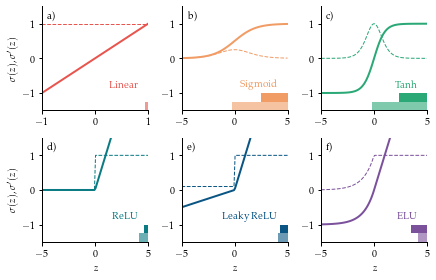

In [403]:
#Activation functions

fig, axs = six_plots(height=4)

for i,fn in enumerate(activations):
    
    tw = axs[i].twiny()
    tw.barh([-1.5+0.25+0.125], timings[fn], color=COLORS[i], height=0.25 )
    tw.barh([-1.5+0.125], dtimings[fn], color=COLORS[i], alpha=0.6, height=0.25)
    tw.set_xlim([0,1e-7])
    tw.invert_xaxis()
    tw.set_axis_off()
    
    axs[i].plot(x, activations[fn](x), color=COLORS[i], linewidth=2.)
    axs[i].plot(x, activation_derivatives[fn](x), '--', color=COLORS[i], linewidth=1.0)
    axs[i].text(0.9, 0.2, fn, va='bottom', ha='right', color=COLORS[i], transform=axs[i].transAxes)
    #twin.set_yticks([])
    #twin.set_ylim([-1,1.5])

for ax in axs:
    ax.set_ylim([-1.5,1.5])
    ax.set_xlim([-5,5])
    ax.set_yticks([-1,0,1])
    ax.set_xticks([-5,0,5])
    ax.grid(False)

for ax in axs[3:6]:
    ax.set_xlabel(r"$z$")
for ax in [axs[0], axs[3]]:
    ax.set_ylabel(r"$\sigma(z), \sigma'(z)$")


axs[0].set_xlim([-1,1])
axs[0].set_xticks([-1,0,1])

for a in axs:
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    
publish_figure("activationfunctions.pdf")




/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/optimizercurves.pdf


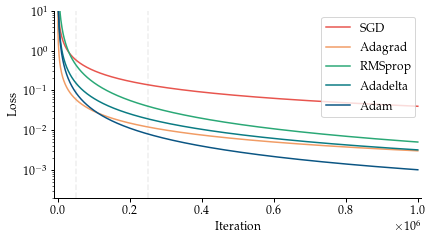

In [7]:
#Optimizers

fig, axs = single_wide()
Sx=1e6
opts = [
    [f"SGD", lambda x: 0.01*Sx/x**0.9],
    [f"Adagrad", lambda x: 0.003*Sx/x**1.0],
    [f"RMSprop", lambda x: 5*Sx/x**1.5],
    [f"Adadelta", lambda x: 0.2*Sx/x**1.3],
    [f"Adam", lambda x: 1*Sx/x**1.5],
]

N = 1000

x = np.linspace(0.001,Sx,num=N)   

axs[0].axvline(x=50000,color='#eeeeee', linestyle='--', alpha=1.0)
axs[0].axvline(x=250000,color='#eeeeee', linestyle='--', alpha=1.0)

for i,optimizer in enumerate(opts):
    axs[0].semilogy(x, optimizer[1](x), label=optimizer[0])
    
axs[0].set_ylim([0,10])
axs[0].set_xlim(left=-10000, right=Sx+1e4)
axs[0].legend()
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Iteration")

spineless(axs[0])


    
publish_figure("optimizercurves.pdf")
    

/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/kmills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/kmills/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/overfitting.pdf


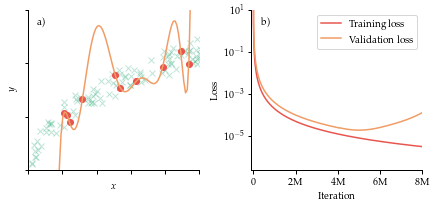

In [399]:
#Overfitting

fig, axs = double_wide()
Sx=1e6
opts = [
    [f"Training loss", lambda x: 2*Sx/x**2],
    [f"Validation loss", lambda x: np.maximum(4*Sx/x**2, 4*Sx/(Sx-x)**2)],
]

N = 1000

x = np.linspace(0.001,Sx,num=N)   



y = opts[1][1](x)
p = 408
y1 = y[0:p]
y2 = y[p:]
y2 = np.convolve(y, np.ones(200)/200, mode='same')[p:]-0.000001
val_loss = np.concatenate((y1,y2))



axs[1].semilogy(x, opts[0][1](x), label=opts[0][0])
axs[1].semilogy(x, val_loss , label=opts[1][0])
    
axs[1].set_ylim([0,10])
axs[1].set_xlim(left=-10000, right=0.8*Sx)
axs[1].legend()
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Iteration")
axs[1].set_xticks([i*1e5 for i in [0,2,4,6,8]])
axs[1].set_xticklabels(["0","2M","4M","6M","8M"])



np.random.seed(5)
N=10
x = (np.random.rand(N)*5+0.1)
y = np.sqrt(x) + (np.random.rand(N)-0.5)*0.5
z = np.polyfit(x, y, 12)

N2 = 100
x1 = (np.random.rand(N2)*5+0.1)
y1 = np.sqrt(x1) + (np.random.rand(N2)-0.5)*0.5

axs[0].plot(x1, y1, 'x', color=COLORS[2], alpha=0.3)

axs[0].plot(x, y, 'o')


xs = np.linspace(0, 5, num=100)

axs[0].plot(xs, np.poly1d(z)(xs))


axs[0].set_xticks([0,1,2,3,4,5])
axs[0].set_yticks([0,1,2,3])

axs[0].set_xticklabels(["" for _ in [0,1,2,3,4,5]])
axs[0].set_yticklabels(["" for _ in [0,1,2,3]])

axs[0].set_xlim(0, 5)
axs[0].set_ylim(0, 3)

axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")

for a in axs:
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)

publish_figure("overfitting.pdf")

https://github.com/millskyle/phd_thesis/raw/main/methods/figs/regularization.pdf


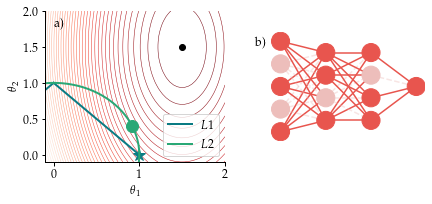

In [23]:



fig, axs = double_wide()

t1 = np.linspace(-0.1,2)
t2 = np.linspace(-0.1,2)
T1,T2 = np.meshgrid(t1,t2)

minimum=(1.5,1.5)
loss = ((T1-minimum[0])/1)**2 + ((T2-minimum[1])/2)**2



ax=axs[0]
ax.contour(T1,T2,loss, levels=40, linewidths=0.5, cmap="Reds_r")
#ax.pcolormesh(T1,T2,loss, cmap="Reds_r", alpha=0.1)
ax.plot(minimum[0], minimum[1], 'ko')
ax.set_ylabel(r"$\theta_2$")
ax.set_xlabel(r"$\theta_1$")


t1 = np.linspace(0,1)
t2 = np.linspace(0,1)
  



ax.plot(t2, 1-t1, color=COLORS[3], linewidth=2, label=r"$L1$")
xx = np.linspace(-0.1,0)
ax.plot(xx,xx+1 , color=COLORS[3], linewidth=2)
ax.plot(1, 0, color=COLORS[3], marker='*', markersize=12)

angle = np.linspace(-np.pi, np.pi, 100)
ax.plot(np.sin(angle), np.cos(angle), color=COLORS[2], linewidth=2, label=r"$L2$")
ax.plot(0.92, 0.4, color=COLORS[2], marker='o', markersize=12)


ax.set_xlim([-0.1,2])
ax.set_ylim([-0.1,2])

ax.legend(loc='lower right')

spineless(ax)



c=COLORS[0]
d="#edbebb"
draw_ann(axs[1], layers=[5,4,4,1], dropout=0.7, seed=5,
         colors=[[c,d,c,d,c],[c,d,c,c],[c,c,d,c],[c]], #these colors are hand-chosen for seed=5
         
        )

axs[1].set_axis_off()


publish_figure(name="regularization.pdf")



/home/kmills/git/phd_thesis/methods/phd_plots.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(fname)


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/classificationonehot.pdf


/home/kmills/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


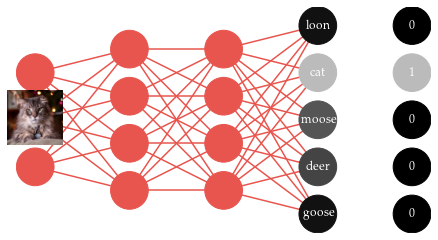

In [69]:
fig, ax = single_wide()




ins = fig.add_axes([0.0,0.4,0.15,0.22])
ins.set_axis_off()
img = plt.imread("include/cat.jpg")
ins.imshow(img)
bounds = draw_ann(ax[0], xy=(0,0), layers=[3,4,4,5], colors=[None, None, None, ["#111","#444","#555","#bbb","#111"]],
         text=[None, None, None, ["goose","deer","moose","cat",'loon']])

draw_ann(ax[0], xy=(8,0), layers=[5],  text=[["0","0","0","1",'0']],
                                       colors=[['#000']*3 + ['#bbb'] + ['#000']],
                                       bounds=bounds)

ax[0].set_axis_off()

publish_figure("classificationonehot.pdf")

/home/kmills/git/phd_thesis/methods/phd_plots.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(fname)


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/convolutionallayer.pdf


/home/kmills/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


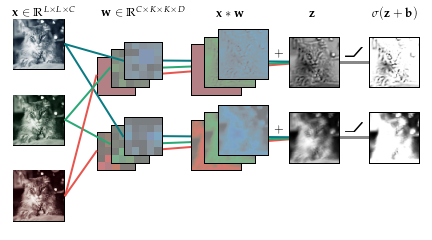

In [39]:
from scipy.signal import convolve2d as conv
import cv2


img = cv2.imread("include/cat.jpg")
cat = cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

cxns = []
cxn_color = [COLORS[0], COLORS[2], COLORS[3]]

fig, axs = single_wide(height=3.5)

cmaps = ["Reds_r", "Greens_r", "Blues_r"]

axinps = []


ks = 5
kernels = np.random.rand(3,ks,ks,2)-1
#define where the axes will be placed
input_pos = [[0, 0.1+0.3*i,0.2,0.2] for i in range(3)]
output_pos = [[0.80, 0.30+0.3*ko+0.03,0.20,0.20] for ko in range(kernels.shape[-1])]

for i in range(3):
    ax = fig.add_axes(input_pos[i])
    ax.imshow(cat[:,:,i], cmap="Greys_r", zorder=10)
    ax.imshow(cat[:,:,i], cmap=cmaps[i], alpha=0.2, zorder=11)
    axinps.append(ax)

R,G,B=(0,1,2)
O1,O2=(0,1)
np.random.seed(4)





#kernels[B,1,3,O1] = 8
kernels[:,1:3,2:4,O2] = 1.5
x,y = (16,16)
kernels[:,:,:,O1] = np.transpose(cat[x:x+ks,y:y+ks,:], (2,0,1))/255
kernels[:,:,:,O1] -= np.mean(kernels[:,:,:,O1])
kernels[:,:,:,O1] **= 2
kernels[R,:,:,O2] = 0

kernels *= -1



#kernels[R,:,4,O2] = 8

ax_ks = []

for k in range(kernels.shape[-1]):
    for kc in range(kernels.shape[0]):
        ax_pos = [0.2+0.03*kc, 0.3+0.3*k+0.03*kc,0.15,0.15]
        ax = fig.add_axes(ax_pos)
        
        #cxn to input
        cxns.append(matplotlib.lines.Line2D([ax_pos[0]+0.2*ax_pos[2],
                                             input_pos[kc][0] + 0.8*input_pos[kc][2]], 
                                            [ax_pos[1]+0.5*ax_pos[3], 
                                             input_pos[kc][1] + 0.5*input_pos[kc][3]],
                      transform=fig.transFigure, color=cxn_color[kc], linewidth=2, linestyle='-'))
        #cxn to output
        cxns.append(matplotlib.lines.Line2D([ax_pos[0]+0.8*ax_pos[2],
                                             output_pos[k][0] + 0.5*output_pos[k][2]-0.18], 
                                            [ax_pos[1]+0.5*ax_pos[3], 
                                             output_pos[k][1] + 0.5*output_pos[k][3]],
                      transform=fig.transFigure, color=cxn_color[kc], linewidth=2, linestyle='-', zorder=-1))
        
        
        ax.imshow(kernels[kc,:,:,k], cmap="Greys")
        ax.imshow(kernels[kc,:,:,k], cmap=cmaps[kc], alpha=0.5)
        ax_ks.append(ax)
    

def con(inp1, inp2):
    return conv(inp1, inp2, mode='valid')

#outputs
ax_os = []
outputs = []
axs_conv = []
for ko in range(kernels.shape[-1]):  #for each output
    ax = fig.add_axes(output_pos[ko])
    
    o = np.zeros_like(con(cat[:,:,ko], kernels[0,:,:,ko]))  #make a correctly shaped zero array
    
    for ki in range(kernels.shape[0]): #for each input channel       
        conv_result = con(cat[:,:,ki], kernels[ki,:,:,ko])
        
        conv_ax = fig.add_axes([0.4 + 0.03*ki, 0.3+0.3*ko+0.03*ki, 0.2, 0.2])
        axs_conv.append(conv_ax)
        
        conv_ax.imshow(conv_result, cmap='Greys')
        conv_ax.imshow(conv_result, cmap=cmaps[ki], alpha=0.5)
        
        o += conv_result
           
    outputs.append(o)
    
    pos = output_pos[ko]
    ax_sum = fig.add_axes([pos[0]-0.18, pos[1], pos[2], pos[3] ])
    ax_sum.imshow(o, cmap='Greys')
    
    cxns.append(matplotlib.lines.Line2D([output_pos[ko][0] + 0.5*output_pos[ko][2],
                                         output_pos[ko][0] + 0.5*output_pos[ko][2]-0.18], 
                                         [output_pos[ko][1] + 0.5*output_pos[ko][3], 
                                         output_pos[ko][1] + 0.5*output_pos[ko][3]],
                      transform=fig.transFigure, color='#888888', linewidth=3, linestyle='-', zorder=-1))
    
    #we'll set the bias to the median, for simplicity and visual appeal
    ax.imshow(relu(o-np.median(o)*1.1), cmap='Greys')
    
   
    
    ax_os.append(ax)
    ax_os.append(ax_sum)
 
       
_ = [ fig.text(0.63, 0.75-0.3*i, r"$+$") for i in range(2)]

fig.text(0.04,0.91, r"$\mathbf{x}\in\mathbb{R}^{L\times L\times C}$")
fig.text(0.24,0.91, r"$\mathbf{w}\in\mathbb{R}^{C \times K \times K \times D}$")
fig.text(0.50,0.91, r"$\mathbf x*\mathbf w$")
fig.text(0.71,0.91, r"$\mathbf z$")
fig.text(0.85,0.91, r"$\sigma(\mathbf z + \mathbf b)$")

newaxs = [fig.add_axes([0.79,0.45+0.3*i,0.04,0.04]) for i in range(2)]
x = np.linspace(-1,1)
for ax in newaxs:
    ax.plot(x, relu(x), color='k')
    

fig.lines.extend(cxns)    
    
    
for ax in axinps + ax_ks + ax_os + axs_conv:
    ax.set_xticks([])
    ax.set_yticks([])
    
for ax in newaxs + [axs[0]]:    
    ax.set_axis_off()

    
publish_figure(name='convolutionallayer.pdf')


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/generativemodels.pdf

egin{figure}[tb]
  \centering
  \includegraphics{graphics/methods/generativemodels.pdf}
  \caption{}
  \label{fig:generativemodels}
\end{figure}
         


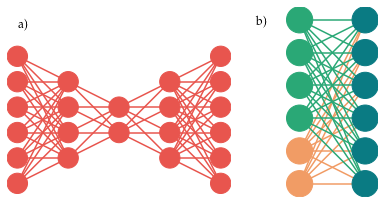

In [65]:
fig, axs = double_wide()

draw_ann(axs[0], xy=(0,-4), layers=[6,4,2,4,6])
axs[0].set_axis_off()

draw_ann(axs[1], layers=[6,6], colors=[[COLORS[1]]*2+[COLORS[2]]*4, [COLORS[3]]*6])
axs[1].set_axis_off()

publish_figure(name="generativemodels.pdf", tex=True)


https://github.com/millskyle/phd_thesis/raw/main/methods/figs/methods_gan_distribution.pdf

egin{figure}[tb]
  \centering
  \includegraphics{graphics/methods/methods_gan_distribution.pdf}
  \caption{}
  \label{fig:methods_gan_distribution}
\end{figure}
         


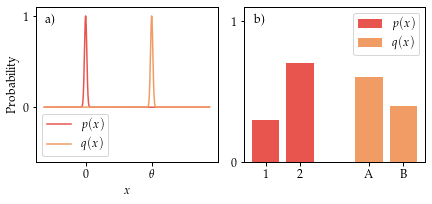

In [49]:
fig, axs = double_wide()
x = np.linspace(0,1,num=1000)
p = np.exp(-((x-0.25)/0.01)**2)
q = np.exp(-((x-0.65)/0.01)**2)
axs[0].plot(x,p, label="$p(x)$")
axs[0].plot(x,q, label="$q(x)$")
axs[0].set_ylabel("Probability")
axs[0].set_xlabel("$x$")
axs[0].set_ylim(-0.6,1.1)

axs[0].set_xticks([0.25,0.65])
axs[0].set_yticks([0,1.0])
axs[0].set_xticklabels(["0",r"$\theta$"])
axs[0].legend()


axs[1].bar(x=[1,2], height=[0.3,0.7], label="$p(x)$")
axs[1].bar(x=[4,5], height=[0.6,0.4], label="$q(x)$")
axs[1].set_xticks([1,2,4,5])
axs[1].set_xticklabels(["1","2","A","B"])
axs[1].set_ylim(0,1.1)
axs[1].set_yticks([0,1])
axs[1].legend()


publish_figure(name="methods_gan_distribution.pdf", tex=True)